<a href="https://colab.research.google.com/github/Srividhyak2011/Demo-Datascienceproject/blob/main/srividhya__M5_MP8_NB_Covid_19_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Mini Project Notebook 08: COVID-19 RNA

## Learning Objectives

At the end of the experiment, you will be able to :

* Basic understanding of Covid-19 genome data

## Introduction
Viral proteins are proteins generated by a virus. As viruses hijack much of their host's cellular machinery to support their life cycle, they encode very few of their own genes; viral proteins are therefore generally structural components, for the viral envelope and capsid [[1]](https://www.nature.com/subjects/viral-proteins).


In this study, we will try to identify those viral proteins in the novel COVID-19 genome, the genome was sequenced from a sample of bronchoalveolar lavage fluid from a single patient who was a worker at the market and who was admitted to the Central Hospital of Wuhan on 26 December 2019. Comparative analysis of the COVID-19 viral proteins with the SARS, MERS and other bat coronaviruses proteins will be carried in this study.



## Materials and methods
* COVID-19 coronavirus genome sequence from the paper: [A new coronavirus associated with human respiratory disease in China](https://www.nature.com/articles/s41586-020-2008-3#rightslink).




### RNA Overview
Ribonucleic acid (RNA) is a nucleic acid which is directly involved in protein synthesis. Ribonucleic acid is an important nucleotide with long chains of nucleic acid present in all living cells. Its main role is to act as a messenger conveying instructions from DNA for controlling protein synthesis.
RNA contains the sugar ribose, phosphates, and the nitrogenous bases adenine (A), guanine (G), cytosine (C), and uracil (U). DNA and RNA share the nitrogenous bases A, G, and C. Thymine is usually only present in DNA and uracil is usually only present in RNA. Types Of RNA

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Difference_DNA_RNA-EN.svg/1200px-Difference_DNA_RNA-EN.svg.png" width="600"/>
</div>

Only some of the genes in cells are expressed into RNA. The following are the types of RNA wherein each type is encoded by its own type of gene:

Types of RNA

*   tRNA– The transfer RNA or the tRNA carries amino acids to ribosomes while translation
*   mRNA – The messenger RNA or the mRNA encodes amino acid sequences of a polypeptide
*   rRNA – The ribosomal RNA or the rRNA produces ribosomes with the ribosomal proteins that are organelles responsible for the translation of the mRNA.
*   snRNA – The small nuclear RNA forms the complexes along with proteins which are utilized in RNA processing in the eukaryotes.




## Import necessary libraries

In [ ]:
!pip install livelossplot

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
import warnings
warnings.filterwarnings('ignore')
from livelossplot import PlotLossesKerasTF
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.models import Sequential

In [ ]:
#@title Download dataset
!gdown "1BsHtDyR-KaBWhJ8moqR672WgWuUbUfdB&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1BsHtDyR-KaBWhJ8moqR672WgWuUbUfdB&confirm=t
To: /content/MN908947.txt
100% 30.4k/30.4k [00:00<00:00, 88.8MB/s]


## **Load the Dataset** (2 Marks)
  
  - Ignore the first two rows and rename the comlun

In [ ]:
path="MN908947.txt"

#YOUR CODE HERE
file=open(path,'r')
data=[[]]
for line in file:
    data.append([line])
df1=pd.DataFrame(data,columns=['sequence'])
df=df1.drop(df1.index[0:2],axis=0)
df=df.drop(df.index[427],axis=0)

In [ ]:
df

,sequence
2,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...
3,CGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTG...
4,TAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGC...
5,TTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCG...
6,CCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTT...
...,...
424,CAGACCACACAAGGCAGATGGGCTATATAAACGTTTTCGCTTTTCC...
425,GTGCAGAATGAATTCTCGTAACTACATAGCACAAGTAGATGTAGTT...
426,TTAATCAGTGTGTAACATTAGGGAGGACTTGAAAGAGCCACCACAT...
427,GATCGAGTGTACAGTGAACAATGCTAGGGAGAGCTGCCTATATGGA...


##   **Data Pre-Processing**  (3 Marks)

####  Clean and Transform the data into a specified format using keras tokenizer


In [ ]:
# Use the tokenizer to transform the text messages
#YOUR CODE HERE
abstracts=df['sequence']
tokenizer=tf.keras.preprocessing.text.Tokenizer(num_words=None,lower=False,char_level=True)
tokenizer.fit_on_texts(abstracts)
sequences=tokenizer.texts_to_sequences(abstracts)

In [ ]:
# Transforms each sequence in sequences to a list of texts using tokenizer.index_word

#YOUR CODE HERE
idx_word=tokenizer.index_word
idx_word

{1: 'T', 2: 'A', 3: 'G', 4: 'C', 5: '\n'}

**Load the feature and labes**

In [ ]:
# Create two empty lists called features and labels.
# Calculate the number of words in the vocabulary plus one for padding
# Loop over each sequence
# For each sequence, loop over a range of indices starting from training_length and going up to the length of the sequence using the syntax for i in range(training_length, len(seq)):.
# This will create a sliding window of length training_length + 1 that moves through the sequence.
# Extract the sliding window from the current position i back to i-training_length, inclusive, and store it in a variable called extract.
# Append the first training_length elements of the extract list (excluding the last two elements) to the features list using the syntax features.append(extract[:-2]).
# Append the second-to-last element of the extract list (i.e. the label) to the labels list using the syntax labels.append(extract[-2]).
# Create a numpy array of zeros with shape (len(features), num_words), and store it in a variable called label_array
# For each label, set the value of the corresponding row and column in label_array to 1
# This creates a one-hot encoding of the labels, that you can use as input to a text classification model.

features=[]
labels=[]

#YOUR CODE HERE
training_length=70
num_words=len(idx_word)+1
for seq in sequences:
    for i in range(training_length,len(seq)):
        extract=seq[i-training_length:i+1]
        features.append(extract[:-2])
        labels.append(extract[-2])


label_array=np.zeros((len(features),num_words),dtype=np.int8)
for example_index,word_index in enumerate(labels):
    label_array[example_index,word_index]=1

In [ ]:


# Refine the shape feature and labels

#YOUR CODE HERE
X = np.array(sequences)
y = np.array(label_array)

X = X.reshape(7,61,71)
y = y.reshape(7,61,6)
print("Shape of X is: " + str(X.shape) + " Shape of y is: " + str(y.shape))

Shape of X is: (7, 61, 71) Shape of y is: (7, 61, 6)


In [ ]:
# Split the data

# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

##   **Build and Train the Deep Recurrent Model using RNN/LSTM**  (3 Marks)



### **Modeling with LSTM**
Long short-term memory (LSTM) is an artificial neural network used in the fields of artificial intelligence and deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. Such a recurrent neural network (RNN) can process not only single data points (such as images), but also entire sequences of data (such as speech or video). For example, LSTM is applicable to tasks such as unsegmented, connected handwriting recognition, speech recognition, machine translation, robot control, video games, and healthcare. LSTM has become the most cited neural network of the 20th century.

<div>
<img src="https://www.mdpi.com/sensors/sensors-21-05625/article_deploy/html/images/sensors-21-05625-g001.png" width="600"/>
</div>

The name of LSTM refers to the analogy that a standard RNN has both "long-term memory" and "short-term memory". The connection weights and biases in the network change once per episode of training, analogous to how physiological changes in synaptic strengths store long-term memories; the activation patterns in the network change once per time-step, analogous to how the moment-to-moment change in electric firing patterns in the brain store short-term memories. The LSTM architecture aims to provide a short-term memory for RNN that can last thousands of timesteps, thus "long short-term memory".

A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell.

LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series. LSTMs were developed to deal with the vanishing gradient problem that can be encountered when training traditional RNNs. Relative insensitivity to gap length is an advantage of LSTM over RNNs, hidden Markov models and other sequence learning methods in numerous applications.

The compact forms of the equations for the forward pass of an LSTM cell with a forget gate are:


<div>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/dc89390b3136ccbbc223a1ed110c6d2b4856069c" width="300"/>
</div>



In [ ]:
# Step 1 - Build & Compile the model

# YOUR CODE HERE
def get_lstm_model():

    inputs = tf.keras.layers.Input(shape=(X_train.shape[1:]))

    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(inputs)

    output = tf.keras.layers.Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05),
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4),
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(x)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05),
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4),
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05),
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4),
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05),
                                    bias_initializer='zeros',
                                    kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
                                    bias_regularizer=tf.keras.regularizers.L2(1e-4),
                                    activity_regularizer=tf.keras.regularizers.L2(1e-5))(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(num_words, activation='softmax')(output)



    model = tf.keras.models.Model(inputs=inputs, outputs=output)

    model.compile(
        metrics = ["accuracy"],
        optimizer = tf.keras.optimizers.Adam(),
        loss = tf.keras.losses.mean_squared_error
    )

    return model
model = get_lstm_model()
print(model.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 61, 71)]          0         
                                                                 
 bidirectional_4 (Bidirecti  (None, 61, 256)           204800    
 onal)                                                           
                                                                 
 dense_20 (Dense)            (None, 61, 128)           32896     
                                                                 
 dropout_16 (Dropout)        (None, 61, 128)           0         
                                                                 
 dense_21 (Dense)            (None, 61, 64)            8256      
                                                                 
 dropout_17 (Dropout)        (None, 61, 64)            0         
                                                           

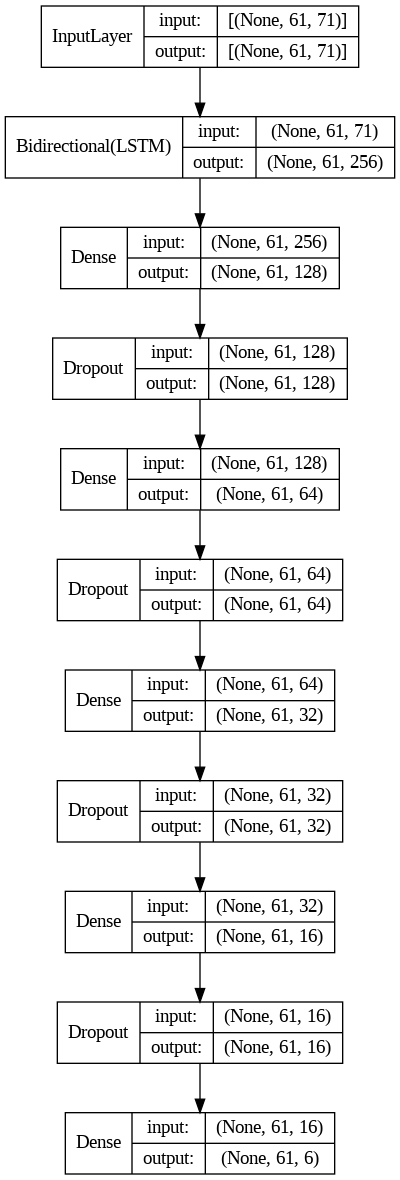

In [ ]:
# Step 2 - plot the model using keras plot_model
# YOUR CODE HERE
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False, to_file="lstmmodel.png")

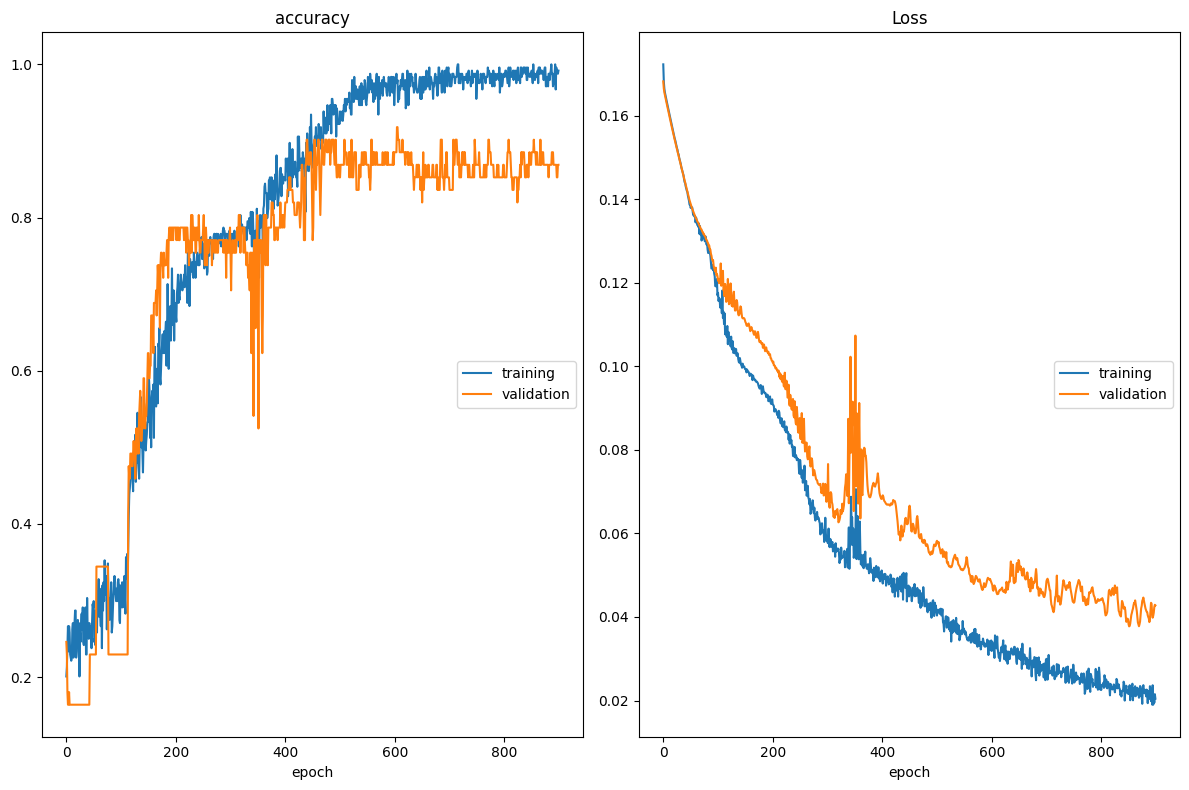

accuracy
	training         	 (min:    0.201, max:    1.000, cur:    0.992)
	validation       	 (min:    0.164, max:    0.918, cur:    0.869)
Loss
	training         	 (min:    0.019, max:    0.172, cur:    0.020)
	validation       	 (min:    0.038, max:    0.168, cur:    0.043)
1/1 [==============================] - 1s 551ms/step - loss: 0.0204 - accuracy: 0.9918 - val_loss: 0.0428 - val_accuracy: 0.8689


In [ ]:
# Step 3 - Train the model
# YOUR CODE HERE
#es=tf.keras.callb acks.EarlyStopping(monitor='val_loss', patience=7, mode='min')
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)
pt=PlotLossesKerasTF()
history = model.fit(X_train, y_train, epochs=900, batch_size=64, validation_split=0.2,
                    callbacks=[mc,pt], shuffle=False)

### **LSTM Model plot the accuracy** (2 Marks)

In [ ]:
# YOUR CODE HERE
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 30ms/step - loss: 0.0515 - accuracy: 0.8361


[0.05145332217216492, 0.8360655903816223]